In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
import pandas as pd

In [49]:
TOPIC_FILE = r'topics\2.txt'

def read_topic(path):
    df = pd.read_csv(path, header=None, sep=';')
    df.columns = ['term', 'score']
    return df

df = read_topic(TOPIC_FILE)

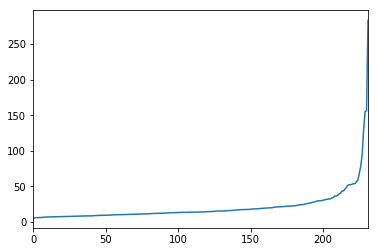

In [18]:
df.score.plot()

In [ ]:
# To get to the elbow, draw a line between the top right and bottom left corner and 
# get the point that is farthest away from that curve. 

In [19]:
from numpy import cross, subtract
from numpy.linalg import norm

def distance(p, a, b):
    return norm(cross(subtract(b, a), subtract(a, p)))  / norm (subtract(b, a))

In [87]:
def map_distance(series):
    # Line:
    bottom_left = (0, series.min())
    top_right = (len(series) - 1, series.max())
    return pd.Series(distance(p, bottom_left, top_right) for p in enumerate(series))
    
df['distance'] = map_distance(df.score)

In [122]:
elbow_score = df.score[df.distance == df.distance.max()]
#elbow_score
df


,term,score,d,distance
0,management,5.497831,0.000000,0.000000
1,advantage,5.522715,0.753326,0.753326
2,computing,5.861587,1.306022,1.306022
3,usa,5.921815,2.036765,2.036765
4,designed,5.942556,2.792738,2.792738
5,technical,6.029256,3.506566,3.506566
6,requirements,6.274679,4.118973,4.118973
7,consists,6.439008,4.783198,4.783198
8,supported,6.502008,5.512169,5.512169
9,currently,6.627805,6.201015,6.201015


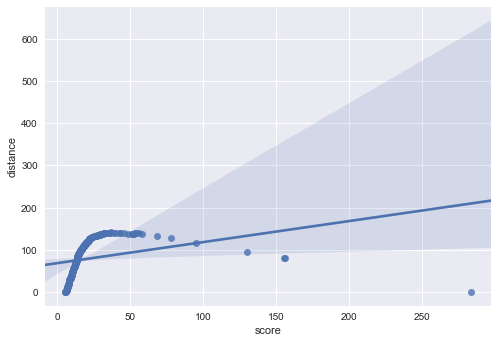

In [136]:
import seaborn as sns
sns.regplot(df.score, df.distance)

In [ ]:
# Identify relevant topics based on their 
# summed scores

In [120]:
import glob
topics = glob.glob(r'topics\*.txt')

frames = [(topic, read_topic(topic)) for topic in topics]
topic_scores = pd.DataFrame(
     (topic, frame.score.sum()) for topic, frame in frames
)
topic_scores.columns = ['topic', 'score']

# Filters all topics that are below the elbow. 
# The elbow marks the spot under which topics become irrelevant. 
topic_scores['distance'] = map_distance(topic_scores.score)
elbow_score = topic_scores.score[topic_scores.distance == topic_scores.distance.max()].iloc[0]
topic_scores[topic_scores.score > elbow_score]

,topic,score,distance
0,topics\0.txt,63.051016,0.083780
4,topics\12.txt,6708.257388,7.783789
5,topics\13.txt,7966.981343,8.999986
7,topics\2.txt,4828.603411,1.474347
8,topics\3.txt,3532.186073,1.808212
10,topics\5.txt,5099.310076,1.049024
12,topics\7.txt,7668.780121,1.474964
13,topics\8.txt,4650.181029,4.839786
14,topics\9.txt,4310.782819,6.437352
